In [1]:
!pip install seaborn
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import seaborn as sns
import os
import collections
import pandas as pd


## Load files from datapath

In [3]:
filenames = []
for root, dirs, files in os.walk("./accs_2", topdown=False):
    for name in files:
        filenames.append(os.path.join(root, name))
        
invalid_files = [filename for filename in filenames if 'checkpoints' in filename ]
for invalid_file in invalid_files:
    filenames.remove(invalid_file)
filenames

['./accs_2/exp_17.json',
 './accs_2/exp_26.json',
 './accs_2/exp_34.json',
 './accs_2/exp_32.json',
 './accs_2/exp_5.json',
 './accs_2/exp_33.json',
 './accs_2/exp_1.json',
 './accs_2/exp_0.json',
 './accs_2/exp_14.json',
 './accs_2/exp_29.json',
 './accs_2/exp_2.json',
 './accs_2/exp_21.json',
 './accs_2/exp_31.json',
 './accs_2/exp_6.json',
 './accs_2/exp_23.json',
 './accs_2/exp_24.json',
 './accs_2/exp_11.json',
 './accs_2/exp_10.json',
 './accs_2/exp_7.json',
 './accs_2/exp_19.json',
 './accs_2/exp_15.json',
 './accs_2/exp_18.json',
 './accs_2/exp_13.json',
 './accs_2/exp_16.json',
 './accs_2/exp_12.json',
 './accs_2/exp_8.json',
 './accs_2/exp_25.json',
 './accs_2/exp_20.json',
 './accs_2/exp_4.json',
 './accs_2/exp_9.json',
 './accs_2/exp_27.json',
 './accs_2/exp_3.json',
 './accs_2/exp_28.json',
 './accs_2/exp_30.json',
 './accs_2/exp_22.json',
 './accs_2/exp_35.json']

In [4]:
# Load all files and save them in a list of dictionaries
dict_of_dicts = {}
for filename in filenames:
    f = open(filename)
    key = filename.split('/')[2].split('.')[0]
    dict_of_dicts[key] = json.load(f)    

dict_of_dicts = collections.OrderedDict(sorted(dict_of_dicts.items()))

N = 36

In [5]:
mi_list = []
for key in range(2, len(dict_of_dicts)):
    exp_dict = dict_of_dicts[f'exp_{key}']
    for idx in range(10):
        mi_key = f'{idx}_MI'
        mi_list.append(exp_dict[mi_key])
        
        
mi_list = np.array(mi_list).reshape(10,34)
mi_avgs = np.mean(mi_list,axis=1)
mi_avgs


array([6.44453019, 7.03088532, 6.72159185, 6.88105814, 6.96349282,
       6.89366477, 7.00480114, 6.8493532 , 6.66376704, 7.05604222])

In [6]:
posdis_list = []
bosdis_list = []
acc_list = []
topsim_list = []

for key in dict_of_dicts.keys():
    exp_dict = dict_of_dicts[key]
    posdis = []
    bosdis = []
    topsim = []
    accs = []
    
    for idx in range(10):
        posdis_key = f'{idx}_posdis'
        bosdis_key = f'{idx}_bosdis'
        topsim_key = f'{idx}_topsim'
        acc_key = f'{idx}_acc' 
        
        posdis.append(exp_dict[posdis_key])
        bosdis.append(exp_dict[bosdis_key])
        topsim.append(exp_dict[topsim_key])
        accs.append(exp_dict[acc_key])
        
    posdis_list.append(posdis)
    topsim_list.append(topsim)
    bosdis_list.append(bosdis)
    acc_list.append(accs)
    
dims = [2, 3, 4, 5, 6, 7, 10, 15, 20, 30]
meaning_space = [(dim)**4 for dim in dims]
meaning_space = [[i]for i in meaning_space]*N
meaning_space = sum(meaning_space, [])



posdis_np = np.array(posdis_list)
bosdis_np = np.array(bosdis_list)
topsim_np = np.array(topsim_list)
acc_np = np.array(acc_list)

avg_posdis = np.mean(posdis_list, axis=0)
avg_bosdis = np.mean(bosdis_list, axis=0)
avg_topsim = np.mean(topsim_list, axis=0)
avg_acc = np.mean(acc_list, axis=0)

posdis_list = sum(posdis_list, [])
bosdis_list = sum(bosdis_list, [])
topsim_list = sum(topsim_list, [])
acc_list = sum(acc_list, [])

plt.rcParams["figure.figsize"] = (12,8)

# Plot the Metrics

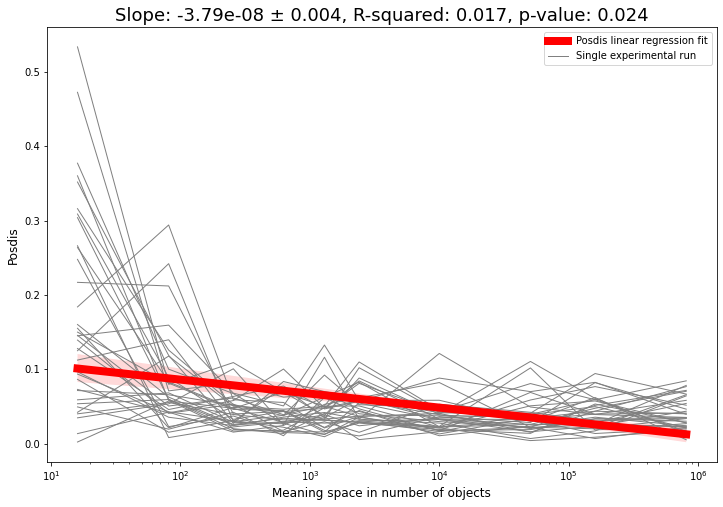

In [7]:
# Let's plot individual lines from an experiment:
for i in range(len(posdis_list)):
    if i == 0:
        exp_posdisses = []
        
    if i % 10 == 0 and i != 0 :
        plt.plot(meaning_space[:10], exp_posdisses, color='grey', linewidth=1)
        exp_posdisses = []
    exp_posdisses.append(posdis_list[i])
    




# Regression plot
sns.regplot(x=meaning_space, y=posdis_list, label='Posdis', logx=True, line_kws={'linewidth':8}, color='red', scatter=False, ci=95)

# Extract the lines from the current axes
lines = plt.gca().get_lines()
selected_lines = [lines[-1], lines[-2]]
labels = ['Posdis linear regression fit', 'Single experimental run']
plt.xlabel('Meaning space in number of objects', fontsize=12)
plt.ylabel('Posdis',fontsize=12)
plt.xscale('log')
plt.legend(selected_lines, labels)
plt.title('Slope: -3.79e-08 ± 0.004, R-squared: 0.017, p-value: 0.024',fontsize = 18)
plt.savefig('posdis results.png')
plt.show()

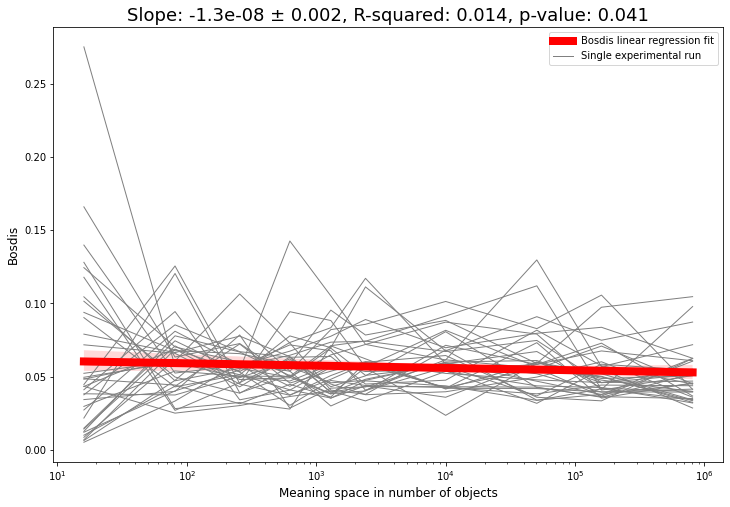

In [8]:
# Let's plot individual lines from an experiment:
for i in range(len(bosdis_list)):
    if i == 0:
        exp_bosdisses = []
        
    if i % 10 == 0 and i != 0 :
        plt.plot(meaning_space[:10], exp_bosdisses, color='grey', linewidth=1)
        exp_bosdisses = []
    exp_bosdisses.append(bosdis_list[i])


sns.regplot(x=meaning_space, y=bosdis_list, label='Bosdis', logx=True, scatter=False, line_kws={'linewidth':8}, color='red', ci=95)

# Extract the lines from the current axes
lines = plt.gca().get_lines()
selected_lines = [lines[-1], lines[-2]]
labels = ['Bosdis linear regression fit', 'Single experimental run']

plt.xlabel('Meaning space in number of objects',fontsize=12)
plt.ylabel('Bosdis',fontsize=12)
plt.xscale('log')
plt.legend(selected_lines, labels)
plt.title('Slope: -1.3e-08 ± 0.002, R-squared: 0.014, p-value: 0.041', fontsize = 18)
plt.savefig('bosdis results.png')
plt.show()

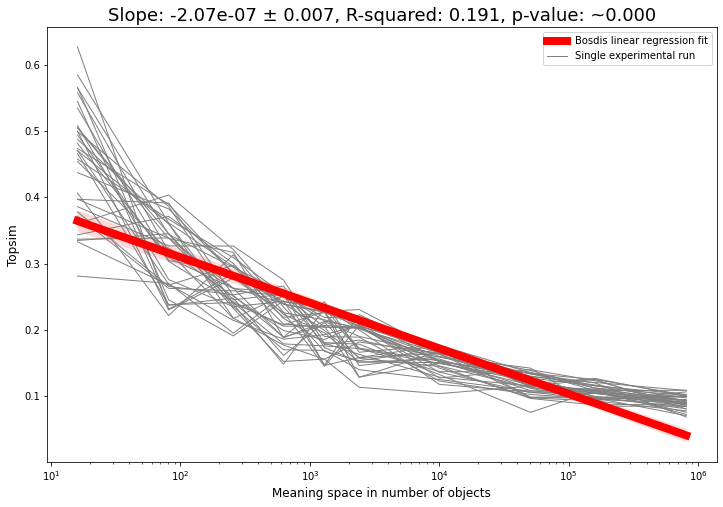

In [9]:
# Let's plot individual lines from an experiment:
for i in range(len(topsim_list)):
    if i == 0:
        exp_topsims = []
        
    if i % 10 == 0 and i != 0 :
        plt.plot(meaning_space[:10], exp_topsims, color='grey', linewidth=1)
        exp_topsims = []
    exp_topsims.append(topsim_list[i])



# Regression plot
sns.regplot(x=meaning_space, y=topsim_list, label='Topographic similarity', logx=True, scatter=False, line_kws={'linewidth':8}, color='red', ci=95)

# Extract the lines from the current axes
lines = plt.gca().get_lines()
selected_lines = [lines[-1], lines[-2]]
labels = ['Bosdis linear regression fit', 'Single experimental run']
plt.xscale('log')
plt.xlabel('Meaning space in number of objects',fontsize=12)
plt.ylabel('Topsim',fontsize=12)
plt.legend(selected_lines,labels)
plt.title('Slope: -2.07e-07 ± 0.007, R-squared: 0.191, p-value: ~0.000',fontsize = 18)
plt.savefig('topsim results.png')
plt.show()

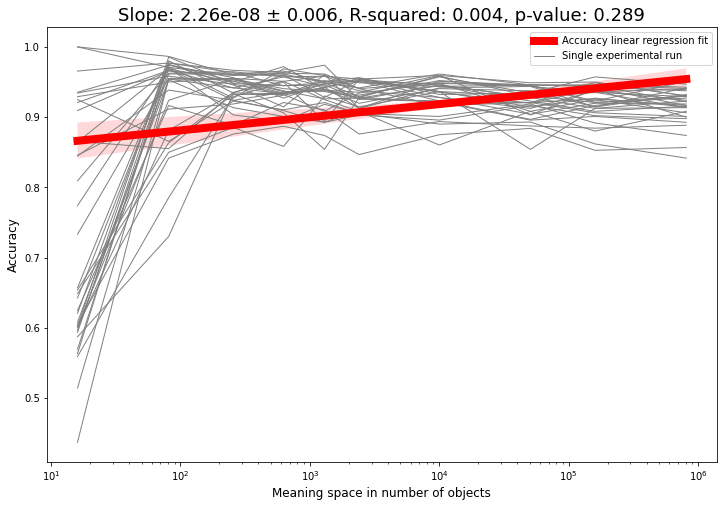

In [10]:
# Let's plot individual lines from an experiment:
for i in range(len(acc_list)):
    if i == 0:
        exp_accs = []
        
    if i % 10 == 0 and i != 0 :
        plt.plot(meaning_space[:10], exp_accs, color='grey', linewidth=1)
        exp_accs = []
    exp_accs.append(acc_list[i])



# Regression plot
sns.regplot(x=meaning_space, y=acc_list, label='Accuracy', logx=True, scatter=False, line_kws={'linewidth':8}, color='red', ci=95)

# Extract the lines from the current axes
lines = plt.gca().get_lines()
selected_lines = [lines[-1], lines[-2]]
labels = ['Accuracy linear regression fit', 'Single experimental run']
plt.xscale('log')
plt.xlabel('Meaning space in number of objects', fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.legend(selected_lines,labels)
plt.title('Slope: 2.26e-08 ± 0.006, R-squared: 0.004, p-value: 0.289',fontsize = 18)
plt.savefig('acc results.png')
plt.show()

In [11]:
meaning_space = [(dim)**4 for dim in dims]
meaning_space = [[i]for i in meaning_space]*34
meaning_space = sum(meaning_space, [])
mi_flattened = list(mi_list.flatten())

mi_df = pd.DataFrame({'meaning space': meaning_space, 'mi': mi_flattened})
mi_df.corr()

,meaning space,mi
meaning space,1.000000,0.198692
mi,0.198692,1.000000


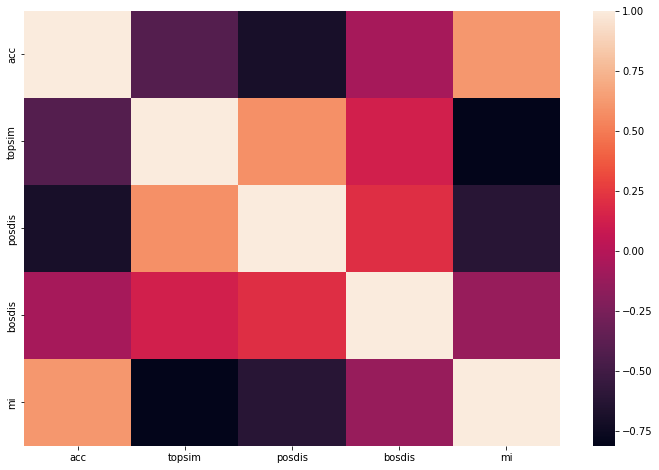

In [12]:
# Plot the correlation between the various metrics
meaning_space = [(dim)**4 for dim in dims]
meaning_space = [[i]for i in meaning_space]*36
results_df = pd.DataFrame({'meaning_space': meaning_space,
                           'acc': acc_list,
                           'topsim': topsim_list,
                           'posdis': posdis_list,
                           'bosdis': bosdis_list})

results_df['mi'] = mi_df.mi
results_df['meaning_space'].apply(lambda x: x[0])


corr = results_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.savefig('corr_plot.png')
plt.show()

In [13]:
from scipy.stats import pearsonr
pvalues = results_df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(len(results_df.columns)-1)
pvalues.round(3)

,acc,topsim,posdis,bosdis,mi
acc,0.00,0.000,0.0,0.240,0.000
topsim,0.00,0.000,0.0,0.014,0.000
posdis,0.00,0.000,0.0,0.000,0.000
bosdis,0.24,0.014,0.0,0.000,0.021
mi,0.00,0.000,0.0,0.021,0.000


In [14]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


X = results_df.meaning_space.to_list()
acc_np = results_df.acc.to_list()

# add constant term
X = sm.add_constant(X)

#perform regression
acc_model = sm.OLS(acc_np, X).fit()
acc_model.summary()

_, acc_slope = acc_model.params
print(f'Slope: {acc_slope:.3} ± {acc_model.bse[0]:.3f}')

Slope: 1.72e-08 ± 0.005


In [15]:
X = results_df.meaning_space.to_list()
topsim_np = results_df.topsim.to_list()

# add constant term
X = sm.add_constant(X)

#perform regression
topsim_model = sm.OLS(topsim_np, X).fit()
topsim_model.summary()

# _, topsim_slope = topsim_model.params
# topsim_model.params
# print(f'Slope: {topsim_slope:.3} ± {topsim_model.bse[0]:.3f}')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     85.44
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           2.19e-18
Time:                        21:30:53   Log-Likelihood:                 317.53
No. Observations:                 360   AIC:                            -631.1
Df Residuals:                     358   BIC:                            -623.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2302      0.006     39.931      0.000       0.219       0.242
x1         -2.037e-07    2.2e-08     -9.243      0.000   -2.47e-07    -1.6e-07
==============================================================================
Omnibus:                       91.775   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.583
Skew:                           1.392   Prob(JB):                     2.03e-38
Kurtosis:                       4.954   Cond. No.                     2.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
X = results_df.meaning_space.to_list()
posdis_np = results_df.posdis.to_list()

# add constant term
X = sm.add_constant(X)

#perform regression
posdis_model = sm.OLS(posdis_np, X).fit()
posdis_model.summary()


# posdis_intercept, posdis_slope, = posdis_model.params
# print(f'Slope: {posdis_slope:.3} ± {posdis_model.bse[0]:.3f}')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     5.563
Date:                Sun, 13 Aug 2023   Prob (F-statistic):             0.0189
Time:                        21:30:53   Log-Likelihood:                 478.77
No. Observations:                 360   AIC:                            -953.5
Df Residuals:                     358   BIC:                            -945.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0620      0.004     16.834      0.000       0.055       0.069
x1         -3.321e-08   1.41e-08     -2.358      0.019   -6.09e-08   -5.52e-09
==============================================================================
Omnibus:                      313.899   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5552.843
Skew:                           3.744   Prob(JB):                         0.00
Kurtosis:                      20.723   Cond. No.                     2.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
X = results_df.meaning_space.to_list()
bosdis_np = results_df.bosdis.to_list()

# add constant term
X = sm.add_constant(X)

#perform regression
bosdis_model = sm.OLS(bosdis_np, X).fit()
bosdis_model.summary()

_, bosdis_slope= bosdis_model.params
print(f'slope: {bosdis_slope:.3} +/- {bosdis_model.bse[0]:.3f}')

slope: -1.02e-08 +/- 0.001


In [18]:
dims = [2, 3, 4, 5, 6, 7, 10, 15, 20, 30]
meaning_space = [(dim)**4 for dim in dims]
meaning_space = [[i]for i in meaning_space]*34
meaning_space = sum(meaning_space, [])

X = list(meaning_space)

X = sm.add_constant(X)

#perform regression
mi_model = sm.OLS(mi_flattened, X).fit()

_, mi_slope = mi_model.params
slope_string_mi = f'slope: {mi_slope:.3} +/- {mi_model.bse[0]:.3f}'
mi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     13.89
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           0.000227
Time:                        21:30:53   Log-Likelihood:                -601.71
No. Observations:                 340   AIC:                             1207.
Df Residuals:                     338   BIC:                             1215.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7268      0.084     79.972      0.000       6.561       6.892
x1          1.198e-06   3.22e-07      3.727      0.000    5.66e-07    1.83e-06
==============================================================================
Omnibus:                      116.104   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.432
Skew:                          -1.765   Prob(JB):                     4.62e-57
Kurtosis:                       5.418   Cond. No.                     2.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
dims = [2, 3, 4, 5, 6, 7, 10, 15, 20, 30]
meaning_space = [(dim)**4 for dim in dims]
meaning_space = [[i]for i in meaning_space]*34
meaning_space = sum(meaning_space, [])

X = list(meaning_space)

X = sm.add_constant(X)

#perform regression
mi_model = sm.OLS(mi_flattened, X).fit()

_, mi_slope = mi_model.params
slope_string_mi = f'slope: {mi_slope:.3} +/- {mi_model.bse[0]:.3f}'
mi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     13.89
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           0.000227
Time:                        21:30:54   Log-Likelihood:                -601.71
No. Observations:                 340   AIC:                             1207.
Df Residuals:                     338   BIC:                             1215.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7268      0.084     79.972      0.000       6.561       6.892
x1          1.198e-06   3.22e-07      3.727      0.000    5.66e-07    1.83e-06
==============================================================================
Omnibus:                      116.104   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.432
Skew:                          -1.765   Prob(JB):                     4.62e-57
Kurtosis:                       5.418   Cond. No.                     2.85e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

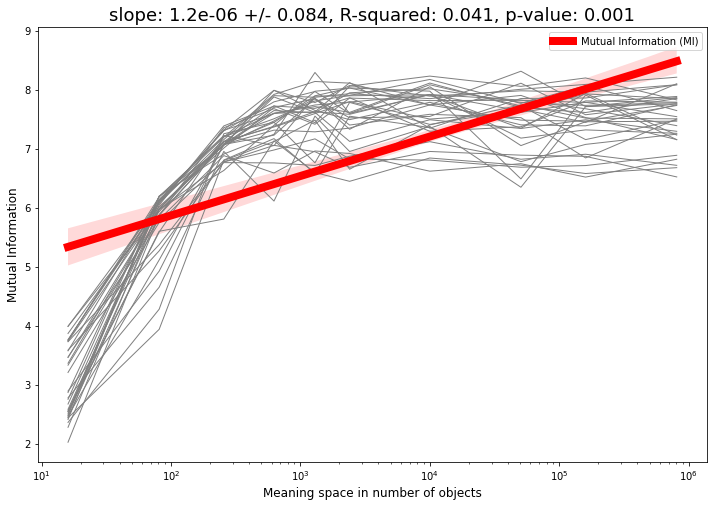

In [20]:
plt.rcParams["figure.figsize"] = (12,8)

# Let's plot individual lines from an experiment:
for i in range(len(mi_flattened)):
    if i == 0:
        exp_mi = []
        
    if i % 10 == 0 and i != 0 :
        plt.plot(meaning_space[:10], exp_mi, color='grey', linewidth=1)
        exp_mi = []
    exp_mi.append(mi_flattened[i])
    
sns.regplot(x=meaning_space, y=mi_flattened, label='Mutual Information (MI)', logx=True, scatter=False, line_kws={'linewidth':8}, color='red', ci=95)

# Extract the lines from the current axes
lines = plt.gca().get_lines()
selected_lines = [lines[-1], lines[-2]]
labels = ['Posdis linear regression fit', 'Single experimental run']
plt.legend(selected_lines,labels)
plt.xscale('log')
plt.xlabel('Meaning space in number of objects', fontsize=12)
plt.ylabel('Mutual Information', fontsize=12)
plt.legend()
plt.title(f'{slope_string_mi}, R-squared: 0.041, p-value: 0.001', fontsize = 18)
plt.savefig('mi results.png')
plt.show()

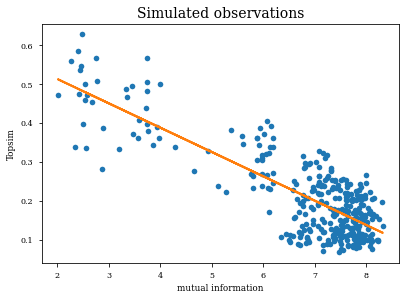

In [21]:
results_df
results_df = results_df.dropna()

X = results_df.mi
X_ols = sm.add_constant(X)
y = results_df.topsim

model = sm.OLS(y, X_ols)
result = model.fit()

plt.style.use('seaborn-paper')
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12, 
    'axes.titlesize': 14,
    'axes.grid': False,
    'lines.linewidth': 2
})

# You have 3 options for plotting: quick, on a figure, on a set of axes
# These are mostly interchangeable but each gives you more control than the last

# Quick:
# plt.plot(X, y)

# On a figure object:
# f = plt.figure()
# f.plot(X, y)

# On axes:
# f, ax = plt.subplots()
# ax.plot(X, y)

b_coef, m_coef = result.params  # params has the fit coefficients
b_err, m_err = result.bse  # bse has the standard error

# Since I often want subplots, I default to the last one for all plotting
f, ax = plt.subplots()
ax.set_title('Simulated observations')
ax.set_xlabel('mutual information')
ax.set_ylabel('Topsim')

# Let's plot the original data points and the regression line
ax.plot(X, y, 'o')
y_regress = m_coef * X + b_coef
ax.plot(X, y_regress, '-')

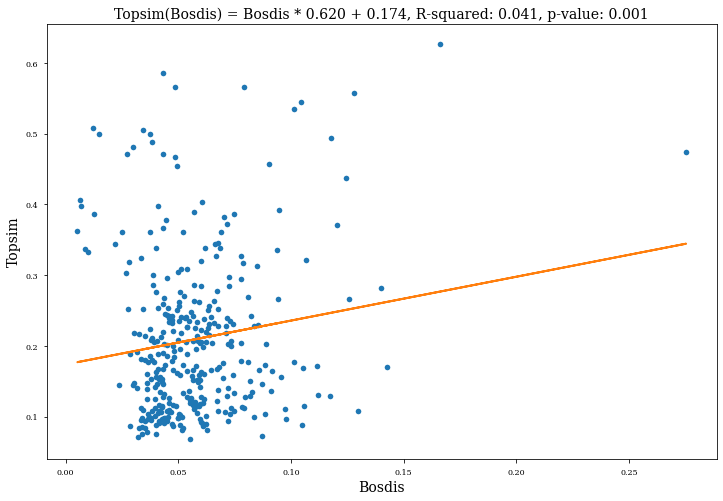

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 topsim   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     7.130
Date:                Sun, 13 Aug 2023   Prob (F-statistic):            0.00795
Time:                        21:30:55   Log-Likelihood:                 265.98
No. Observations:                 340   AIC:                            -528.0
Df Residuals:                     338   BIC:                            -520.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1738      0.015     11.915      0.000       0.145       0.202
bosdis         0.6197      0.232      2.670      0.008       0.163       1.076
==============================================================================
Omnibus:                       68.118   Durbin-Watson:                   1.454
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.012
Skew:                           1.231   Prob(JB):                     9.54e-24
Kurtosis:                       4.193   Cond. No.                         38.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
X = results_df.bosdis
X_ols = sm.add_constant(X)
y = results_df.topsim

model = sm.OLS(y, X_ols)
result = model.fit()

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12, 
    'axes.titlesize': 14,
    'axes.grid': False,
    'lines.linewidth': 2,
    'axes.labelsize': 14

})

b_coef, m_coef = result.params  # params has the fit coefficients
b_err, m_err = result.bse  # bse has the standard error

# Since I often want subplots, I default to the last one for all plotting
f, ax = plt.subplots()
ax.set_title(f'Topsim(Bosdis) = Bosdis * {m_coef:.3f} + {b_coef:.3f}, R-squared: 0.041, p-value: 0.001')
ax.set_xlabel('Bosdis')
ax.set_ylabel('Topsim')

# Let's plot the original data points and the regression line
ax.plot(X, y, 'o')
y_regress = m_coef * X + b_coef
ax.plot(X, y_regress, '-')
plt.savefig('bosdis_topsim_regr.png')
plt.show()
result.summary()

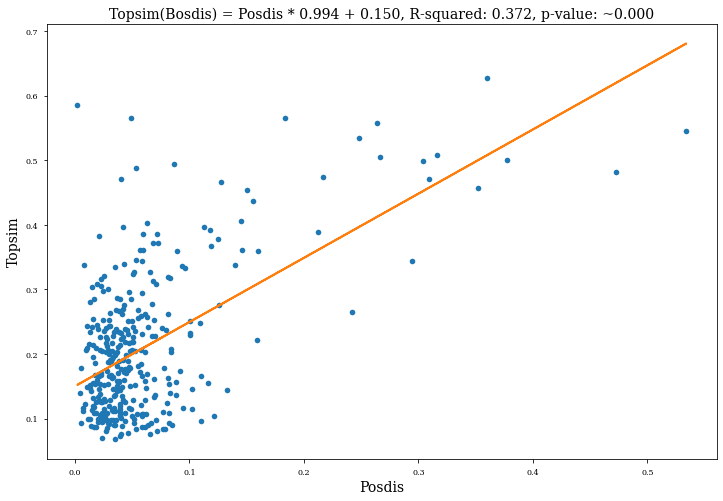

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 topsim   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     176.3
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           1.14e-32
Time:                        21:30:56   Log-Likelihood:                 333.80
No. Observations:                 340   AIC:                            -663.6
Df Residuals:                     338   BIC:                            -655.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1501      0.007     22.601      0.000       0.137       0.163
posdis         0.9938      0.075     13.279      0.000       0.847       1.141
==============================================================================
Omnibus:                       54.531   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.522
Skew:                           0.944   Prob(JB):                     3.64e-20
Kurtosis:                       4.661   Cond. No.                         15.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X = results_df.posdis
X_ols = sm.add_constant(X)
y = results_df.topsim


model = sm.OLS(y, X_ols)
result = model.fit()

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12, 
    'axes.titlesize': 14,
    'axes.grid': False,
    'lines.linewidth': 2,
    'axes.labelsize': 14

})

b_coef, m_coef = result.params  # params has the fit coefficients
b_err, m_err = result.bse  # bse has the standard error

# Since I often want subplots, I default to the last one for all plotting
f, ax = plt.subplots()
ax.set_title(f'Topsim(Bosdis) = Posdis * {m_coef:.3f} + {b_coef:.3f}, R-squared: 0.372, p-value: ~0.000')
ax.set_xlabel('Posdis')
ax.set_ylabel('Topsim')

# Let's plot the original data points and the regression line
ax.plot(X, y, 'o')
y_regress = m_coef * X + b_coef
ax.plot(X, y_regress, '-')
# plt.savefig('posdis_topsim_regr.png')
plt.show()
result.summary()

In [24]:
y = results_df.topsim
X = results_df[['bosdis', 'posdis']]
X_ols = sm.add_constant(X)

model = sm.OLS(y, X_ols)
result = model.fit()

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12, 
    'axes.titlesize': 14,
    'axes.grid': False,
    'lines.linewidth': 2,
    'axes.labelsize': 14

})
plt.rcParams["figure.figsize"] = (12,8)

b_coef, m_bosdis, m_posdis  = result.params  # params has the fit coefficients


y_regress = m_bosdis * X['bosdis'] + m_posdis * X['posdis'] + b_coef
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 topsim   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     88.06
Date:                Sun, 13 Aug 2023   Prob (F-statistic):           1.71e-31
Time:                        21:30:56   Log-Likelihood:                 333.91
No. Observations:                 340   AIC:                            -661.8
Df Residuals:                     337   BIC:                            -650.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1455      0.012     11.959      0.000       0.122       0.169
bosdis         0.0896      0.195      0.460      0.646      -0.293       0.473
posdis         0.9863      0.077     12.865      0.000       0.836       1.137
==============================================================================
Omnibus:                       54.575   Durbin-Watson:                   1.306
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.044
Skew:                           0.942   Prob(JB):                     2.80e-20
Kurtosis:                       4.676   Cond. No.                         39.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

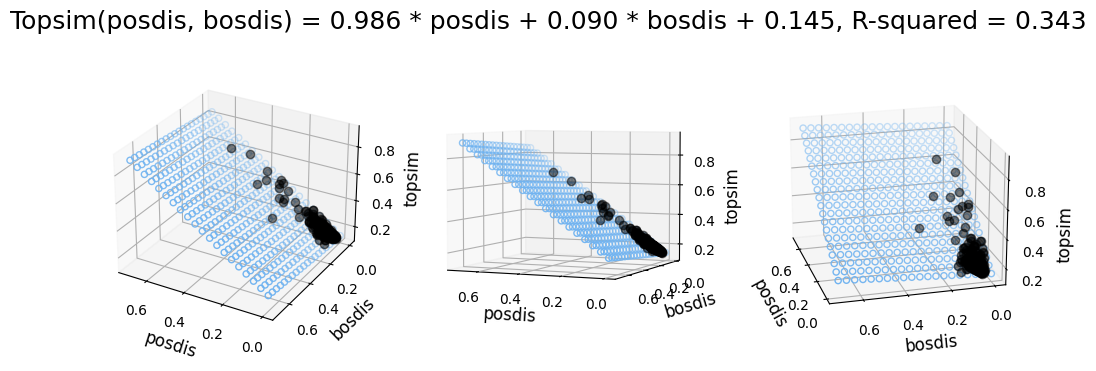

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################

X = results_df[['posdis', 'bosdis']].values.reshape(-1,2)
Y = results_df['topsim']

x_pred = np.linspace(0, 0.7, 20)   # range of porosity values
y_pred = np.linspace(0, 0.7, 20)  # range of brittleness values


######################## Prepare model data point for visualization ###############################

x = X[:, 0]
y = X[:, 1]
z = Y


xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, y_regress, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('posdis', fontsize=12)
    ax.set_ylabel('bosdis', fontsize=12)
    ax.set_zlabel('topsim', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')


ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=20, azim=165)

fig.suptitle(f'Topsim(posdis, bosdis) = {m_posdis:.3f} * posdis + {m_bosdis:.3f} * bosdis + {b_coef:.3f}, R-squared = {r2:.3f}', fontsize=18)
plt.savefig('multiple regression.png')
plt.show()

